**Image Segmentation with Camvid**

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *

# below two lines of codes are to be understood 
from fastai.callbacks.hooks import *
from fastai.utils.mem import *

In [4]:
path = untar_data(URLs.CAMVID)


In [12]:
path.ls()

[PosixPath('/root/.fastai/data/camvid/labels'),
 PosixPath('/root/.fastai/data/camvid/codes.txt'),
 PosixPath('/root/.fastai/data/camvid/valid.txt'),
 PosixPath('/root/.fastai/data/camvid/images')]

In [0]:
path_lbl = path/'labels'
path_img = path/'images'

**Data**

In [0]:
fnames = get_image_files(path_img)


In [15]:
fnames[:3]

[PosixPath('/root/.fastai/data/camvid/images/0001TP_008160.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_07110.png'),
 PosixPath('/root/.fastai/data/camvid/images/0016E5_05190.png')]

In [7]:
lbl_names = get_image_files(path_lbl)


[PosixPath('/root/.fastai/data/camvid/labels/0016E5_08129_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/0001TP_007020_P.png'),
 PosixPath('/root/.fastai/data/camvid/labels/Seq05VD_f04170_P.png')]

In [0]:
lbl_names[:3]

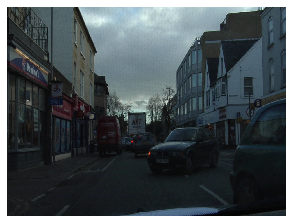

In [8]:
img_f = fnames[0]
img = open_image(img_f)
img.show(figsize=(5,5))

In [0]:
# for a particular image x, the below function returns its segmented image
get_y_fn = lambda x: path_lbl/f'{x.stem}_P{x.suffix}'

open_image for segmentation coded image
data in it


tensor([[[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176]],

        [[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         ...,
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176],
         [0.0667, 0.0667, 0.0667,  ..., 0.1176, 0.1176, 0.1176]],

        [[0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.0157],
         [0.0157, 0.0157, 0.0157,  ..., 0.0157, 0.0157, 0.

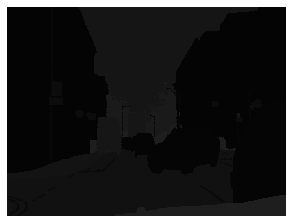

In [27]:
mask = open_image(get_y_fn(img_f))
print("open_image for segmentation coded image")
mask.show(figsize=(5,5), alpha=1)
print("data in it")
mask.data



open_mask for segmentation coded image
data in it


tensor([[[ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4],
         [ 4,  4,  4,  ...,  4,  4,  4],
         ...,
         [17, 17, 17,  ..., 30, 30, 30],
         [17, 17, 17,  ..., 30, 30, 30],
         [17, 17, 17,  ..., 30, 30, 30]]])

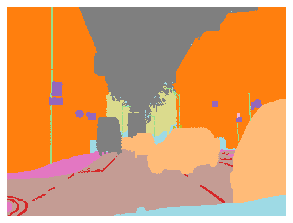

In [29]:
mask = open_mask(get_y_fn(img_f))
print("open_mask for segmentation coded image")
mask.show(figsize=(5,5), alpha=1)
print("data in it")
mask.data

In [30]:
src_size = np.array(mask.shape[1:])
src_size,mask.data

(array([720, 960]), tensor([[[ 4,  4,  4,  ...,  4,  4,  4],
          [ 4,  4,  4,  ...,  4,  4,  4],
          [ 4,  4,  4,  ...,  4,  4,  4],
          ...,
          [17, 17, 17,  ..., 30, 30, 30],
          [17, 17, 17,  ..., 30, 30, 30],
          [17, 17, 17,  ..., 30, 30, 30]]]))

In [12]:
codes = np.loadtxt(path/'codes.txt', dtype=str); codes

array(['Animal', 'Archway', 'Bicyclist', 'Bridge', 'Building', 'Car', 'CartLuggagePram', 'Child', 'Column_Pole',
       'Fence', 'LaneMkgsDriv', 'LaneMkgsNonDriv', 'Misc_Text', 'MotorcycleScooter', 'OtherMoving', 'ParkingBlock',
       'Pedestrian', 'Road', 'RoadShoulder', 'Sidewalk', 'SignSymbol', 'Sky', 'SUVPickupTruck', 'TrafficCone',
       'TrafficLight', 'Train', 'Tree', 'Truck_Bus', 'Tunnel', 'VegetationMisc', 'Void', 'Wall'], dtype='<U17')

**Datasets**

In [13]:
size = src_size//2

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=8
else:           bs=4
print(f"using bs={bs}, have {free}MB of GPU RAM free")

using bs=8, have 16270MB of GPU RAM free


In [0]:
src = (SegmentationItemList.from_folder(path_img)
       .split_by_fname_file('../valid.txt')
       .label_from_func(get_y_fn, classes=codes))

In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

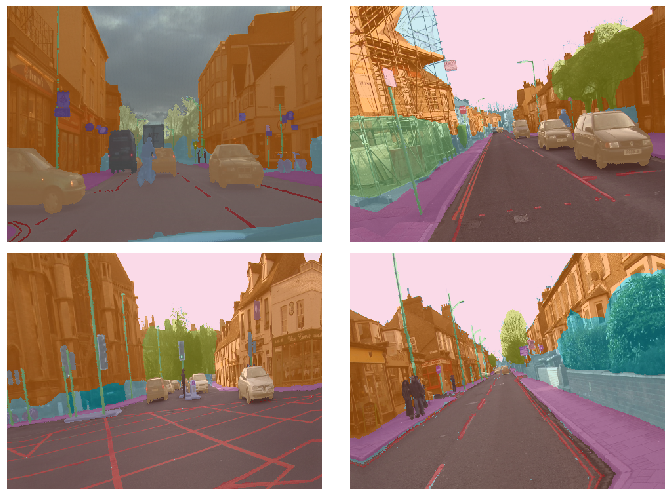

In [16]:
data.show_batch(2, figsize=(10,7))

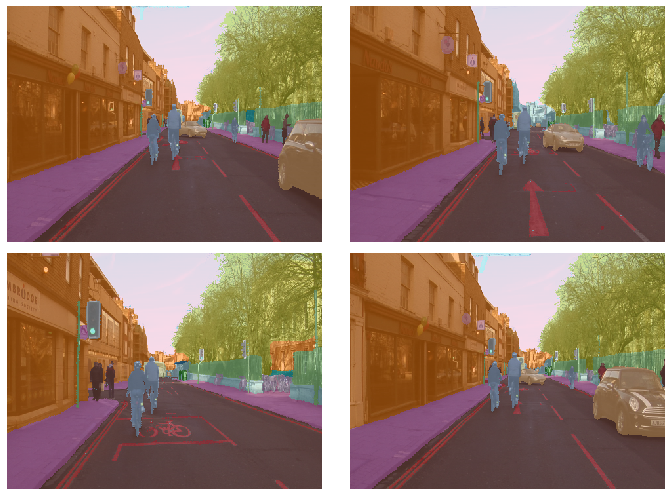

In [20]:
# What is ds_type
data.show_batch(2, figsize=(10,7), ds_type=DatasetType.Valid)

**Model**

In [0]:
name2id = {v:k for k,v in enumerate(codes)}
void_code = name2id['Void']

def acc_camvid(input, target):
    target = target.squeeze(1)
    mask = target != void_code
    return (input.argmax(dim=1)[mask]==target[mask]).float().mean()

In [0]:
metrics=acc_camvid
# metrics=accuracy

In [0]:
wd=1e-2

In [34]:
# What is wd at the end
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:01<00:00, 49.5MB/s]


epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


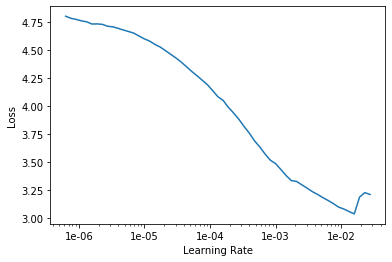

In [35]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=3e-3

In [37]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.9)

epoch,train_loss,valid_loss,acc_camvid,time
0,1.327677,0.960348,0.752397,00:55
1,0.898736,0.612121,0.845964,00:51
2,0.688927,0.495678,0.859832,00:51
3,0.691981,0.608830,0.836047,00:51
4,0.610517,0.449853,0.878667,00:51
5,0.588979,0.459080,0.872384,00:51
6,0.568422,0.487232,0.872165,00:51
7,0.546983,0.427720,0.881521,00:51
8,0.503187,0.420956,0.883393,00:51
9,0.439982,0.320612,0.907468,00:51


In [0]:
learn.save('stage-1')

In [0]:
learn.load('stage-1');

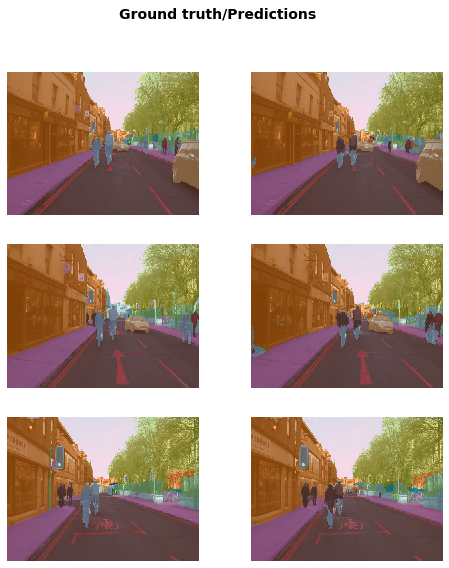

In [40]:
learn.show_results(rows=3, figsize=(8,9)) 

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(lr/400,lr/4)

In [43]:
learn.fit_one_cycle(12, lrs, pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.383236,0.313848,0.907950,00:54
1,0.370684,0.311374,0.907283,00:54
2,0.362668,0.320002,0.903471,00:53
3,0.353713,0.311089,0.908183,00:53
4,0.338436,0.289236,0.916394,00:53
5,0.333844,0.303960,0.912961,00:53
6,0.326905,0.309420,0.912866,00:53
7,0.314249,0.311536,0.908137,00:53
8,0.302855,0.302972,0.914188,00:53
9,0.298424,0.261828,0.926356,00:53


In [0]:
learn.save('stage-2');

**GO BIG?**

In [45]:
learn.destroy()

size = src_size

free = gpu_mem_get_free_no_cache()
# the max size of bs depends on the available GPU RAM
if free > 8200: bs=3
else:           bs=1
print(f"using bs={bs}, have {free}MB of GPU RAM free")

this Learner object self-destroyed - it still exists, but no longer usable
using bs=3, have 15565MB of GPU RAM free


In [0]:
data = (src.transform(get_transforms(), size=size, tfm_y=True)
        .databunch(bs=bs)
        .normalize(imagenet_stats))

In [0]:
learn = unet_learner(data, models.resnet34, metrics=metrics, wd=wd)

In [0]:
learn.load('stage-2');

epoch,train_loss,valid_loss,acc_camvid,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


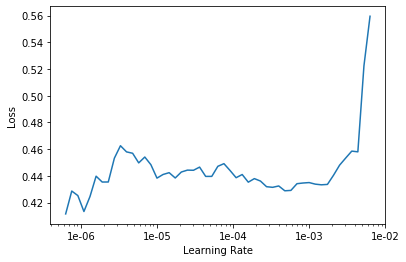

In [49]:
lr_find(learn)
learn.recorder.plot()

In [0]:
lr=1e-3

In [51]:
learn.fit_one_cycle(10, slice(lr), pct_start=0.8)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.389810,0.321797,0.909150,03:38
1,0.329349,0.333824,0.909845,03:35
2,0.324591,0.312939,0.912782,03:35
3,0.320877,0.300819,0.917816,03:35
4,0.350776,0.316827,0.911601,03:35
5,0.318929,0.273843,0.924713,03:35
6,0.342434,0.261301,0.927380,03:35
7,0.310601,0.300024,0.924807,03:35
8,0.278801,0.280277,0.930213,03:35
9,0.237599,0.251072,0.933721,03:35


In [0]:
learn.save('stage-1-big')

In [0]:
learn.load('stage-1-big');

In [0]:
learn.unfreeze()

In [0]:
lrs = slice(1e-6,lr/10)

In [57]:
learn.fit_one_cycle(10, lrs)

epoch,train_loss,valid_loss,acc_camvid,time
0,0.218303,0.249198,0.935150,03:42
1,0.215191,0.258572,0.934017,03:41
2,0.216529,0.235758,0.937202,03:41
3,0.220353,0.253307,0.932543,03:41
4,0.215517,0.249958,0.934669,03:41
5,0.203239,0.251320,0.933384,03:41
6,0.196589,0.245625,0.935976,03:41
7,0.195005,0.251587,0.934881,03:42
8,0.183113,0.252072,0.935646,03:41
9,0.187140,0.253851,0.935860,03:41


In [0]:
learn.save('stage-2-big')

In [0]:
learn.load('stage-2-big');

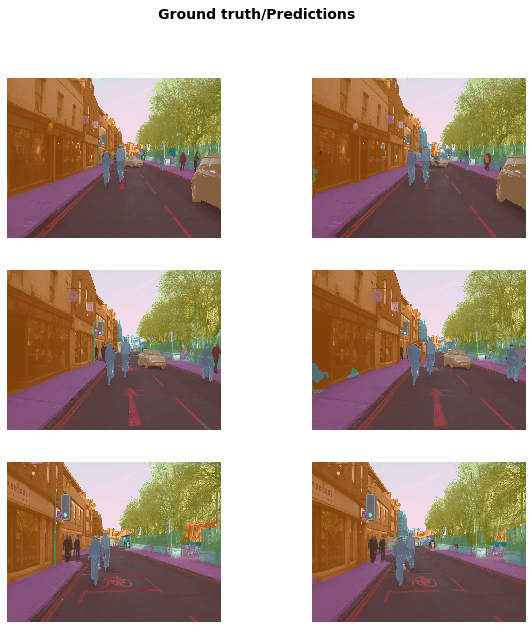

In [60]:
learn.show_results(rows=3, figsize=(10,10))